In [2]:
!pip list     # ver qué librerías hay instaladas en la virtual machine de Colab


Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.8
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.9.30.0.32.59
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         

In [1]:
!pip install pydataset
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
#!pip install yfinance

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
from pydataset import data
import statsmodels as sm
import statsmodels.api as sm_api
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=3ae8e7f041b88c3f11c9e99a52dfb0f7a2f8c0d368351302a45610317fa60a82
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


# Bitcoin

In [6]:
start=dt.datetime(2007, 1, 1)
end=dt.datetime(2024, 10, 1)

# cargar datos en 'bit'

bit=yf.download('BTC-USD', start=start, end=end)
bit


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,65181.019531,36873129847
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,65790.664062,32058813449
2024-09-28,65792.179688,66255.531250,65458.035156,65887.648438,65887.648438,15243637984


In [7]:
type(bit)

pandas.core.frame.DataFrame

In [8]:
bit.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               ...
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30'],
              dtype='datetime64[ns]', name='Date', length=3667, freq=None)

In [9]:
# ver si hay valores ausentes
print(bit.loc[bit['Volume'].isnull()]==True)

# no hay faltantes

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


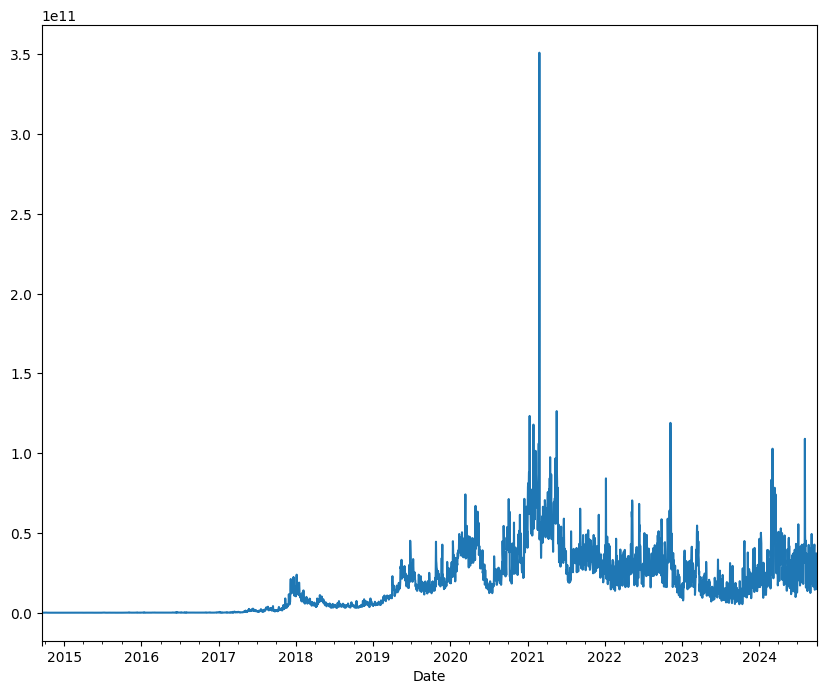

In [10]:
# ver data
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.squeeze.html

serie=bit['Volume'].squeeze()

plot= serie.plot(figsize=(10, 8))
plt.show()

In [11]:
serie

,Volume
Date,
2014-09-17,21056800
2014-09-18,34483200
2014-09-19,37919700
2014-09-20,36863600
2014-09-21,26580100
...,...
2024-09-26,36873129847
2024-09-27,32058813449
2024-09-28,15243637984


# Estacionareidad

In [12]:
'''Test de Dickey-Fuller para determinar si la serie es estacionaria o no

La hipótesis nula de la prueba es que la serie temporal se puede representar
mediante una raíz unitaria, es decir, que no es estacionaria (tiene alguna estructura
dependiente del tiempo).
La hipótesis alternativa (rechazando la hipótesis nula) es que la serie de
tiempo es estacionaria.

Hipótesis nula (H0): si no se rechaza, sugiere que la serie de tiempo tiene una
raíz unitaria, lo que significa que no es estacionaria.
Tiene una estructura dependiente del tiempo.
Hipótesis Alterna (H1): Se rechaza la hipótesis nula; sugiere que la serie de
tiempo no tiene una raíz unitaria, lo que significa que es estacionaria.
No tiene una estructura dependiente del tiempo.
Interpretamos este resultado utilizando el valor p de la prueba.
Un valor de p por debajo de un umbral (como 5 % o 1 %) sugiere que rechazamos
la hipótesis nula (estacionaria); de lo contrario, un valor de p por encima del
umbral sugiere que no rechazamos la hipótesis nula (no estacionaria).
Ej:
p-value > 0.05: No se puede rechazar la hipótesis nula (H0), los datos tienen
raíz unitaria y no son estacionarios.
p-value <= 0.05: Rechazar la hipótesis nula (H0), los datos no tienen raíz
unitaria y son estacionarios.
'''
# https://machinelearningmastery.com/time-series-data-stationary-python/

X = serie.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print('*******')
result

ADF Statistic: -2.427365
p-value: 0.134161
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


(-2.4273651372824854,
 0.13416127484468354,
 29,
 3637,
 {'1%': -3.432149263499404,
  '5%': -2.8623350143451307,
  '10%': -2.5671931983337477},
 176258.98023204773)

# Cuanto más negativo sea este estadístico, más probable es que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).
# Para este caso, el estadístico de la serie es mayor que los valores críticos, entonces debemos aceptar la H0 -> la serie es NO ESTACIONARIA

# Tendencia y Ciclo

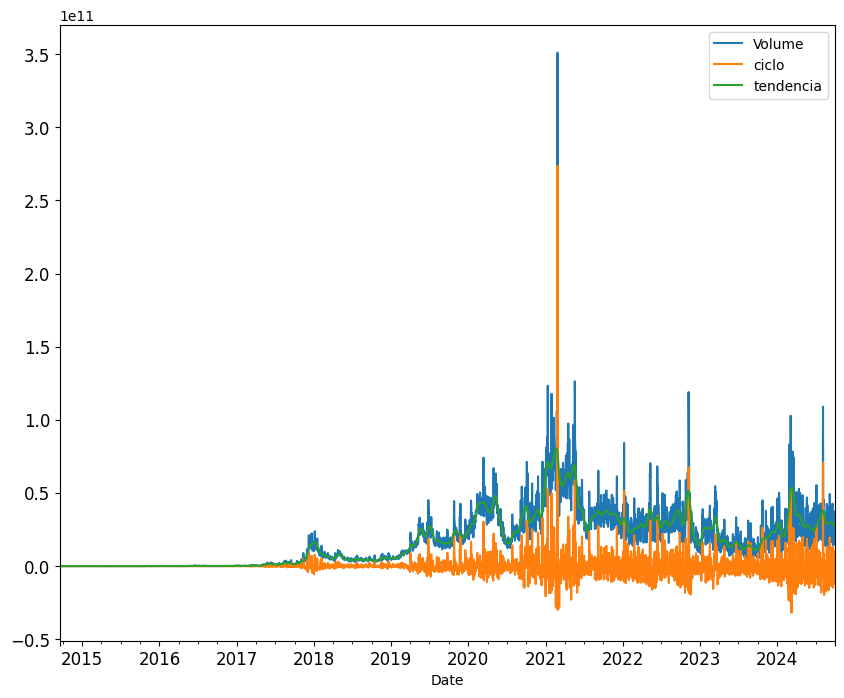

In [13]:
# filtro de Hodrick-Prescott para separar tendencia y componente
# https://www.statsmodels.org/dev/tsa.html

ciclo,tendencia = sm_api.tsa.filters.hpfilter(serie)

bit['ciclo']=ciclo
bit['tendencia']=tendencia   # media móvil anual

bit[['Volume', 'ciclo', 'tendencia']].plot(figsize=(10,8), fontsize=12)
legend=plt.legend()
legend.prop.set_size(14)
plt.show()

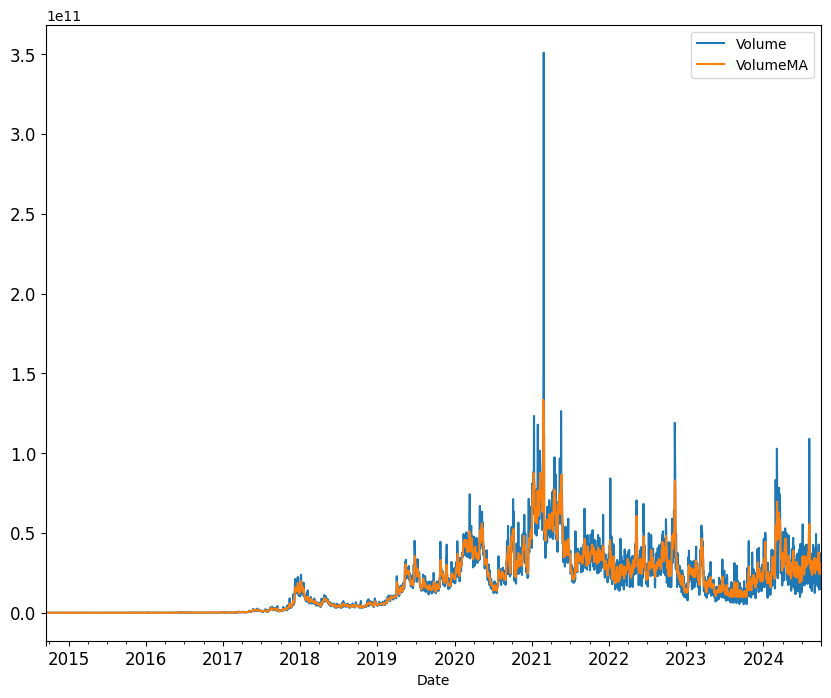

In [14]:
VolumeMA=serie.rolling(window=5, center=True).mean()   # media móvil a 5 días (ventana 'deslizante')
bit['VolumeMA']=VolumeMA
plot=bit[['Volume', 'VolumeMA']].plot(figsize=(10,8), fontsize=12)
plt.show()

# Descomposición

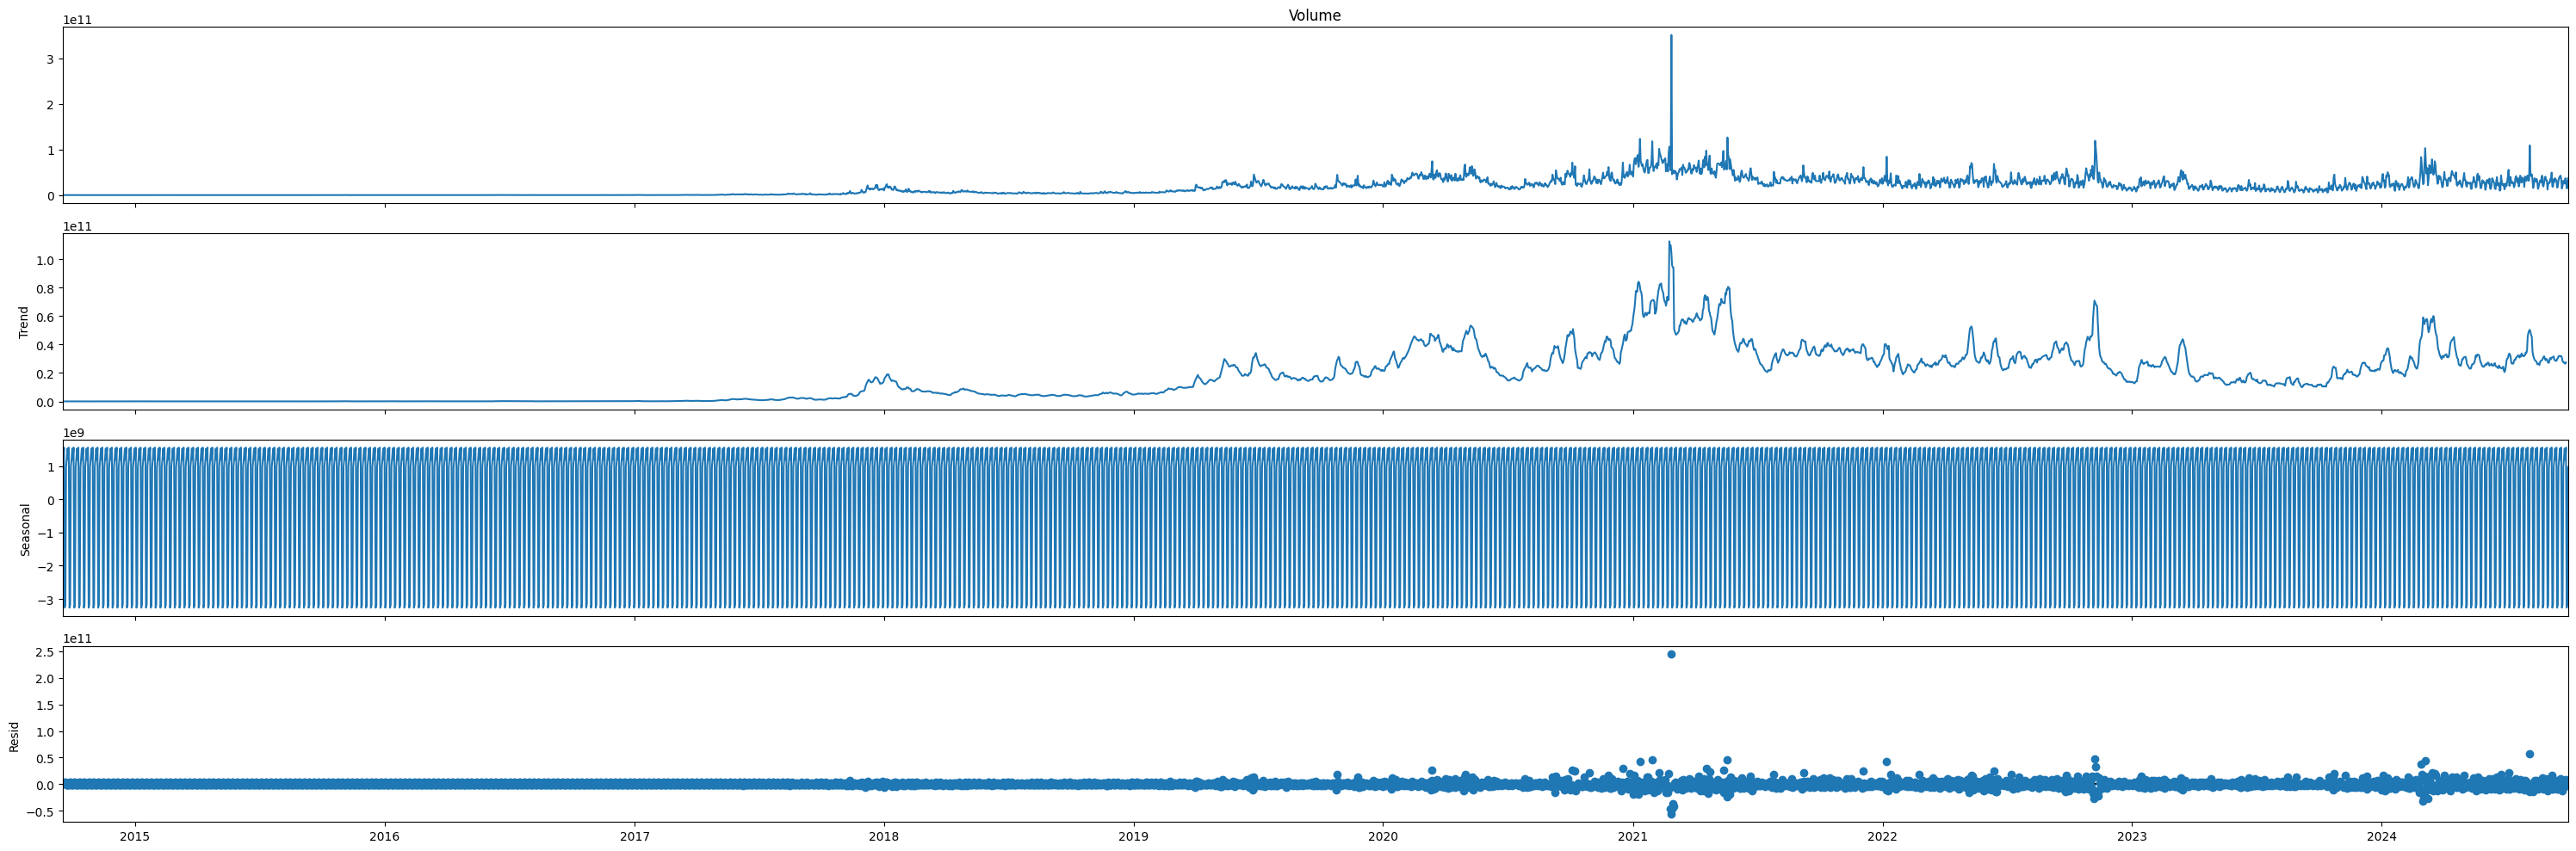

In [15]:
descomposicion=sm_api.tsa.seasonal_decompose(serie, model='additive')

plt.rcParams['figure.figsize'] = [30, 10]
fig=descomposicion.plot()
plt.show()

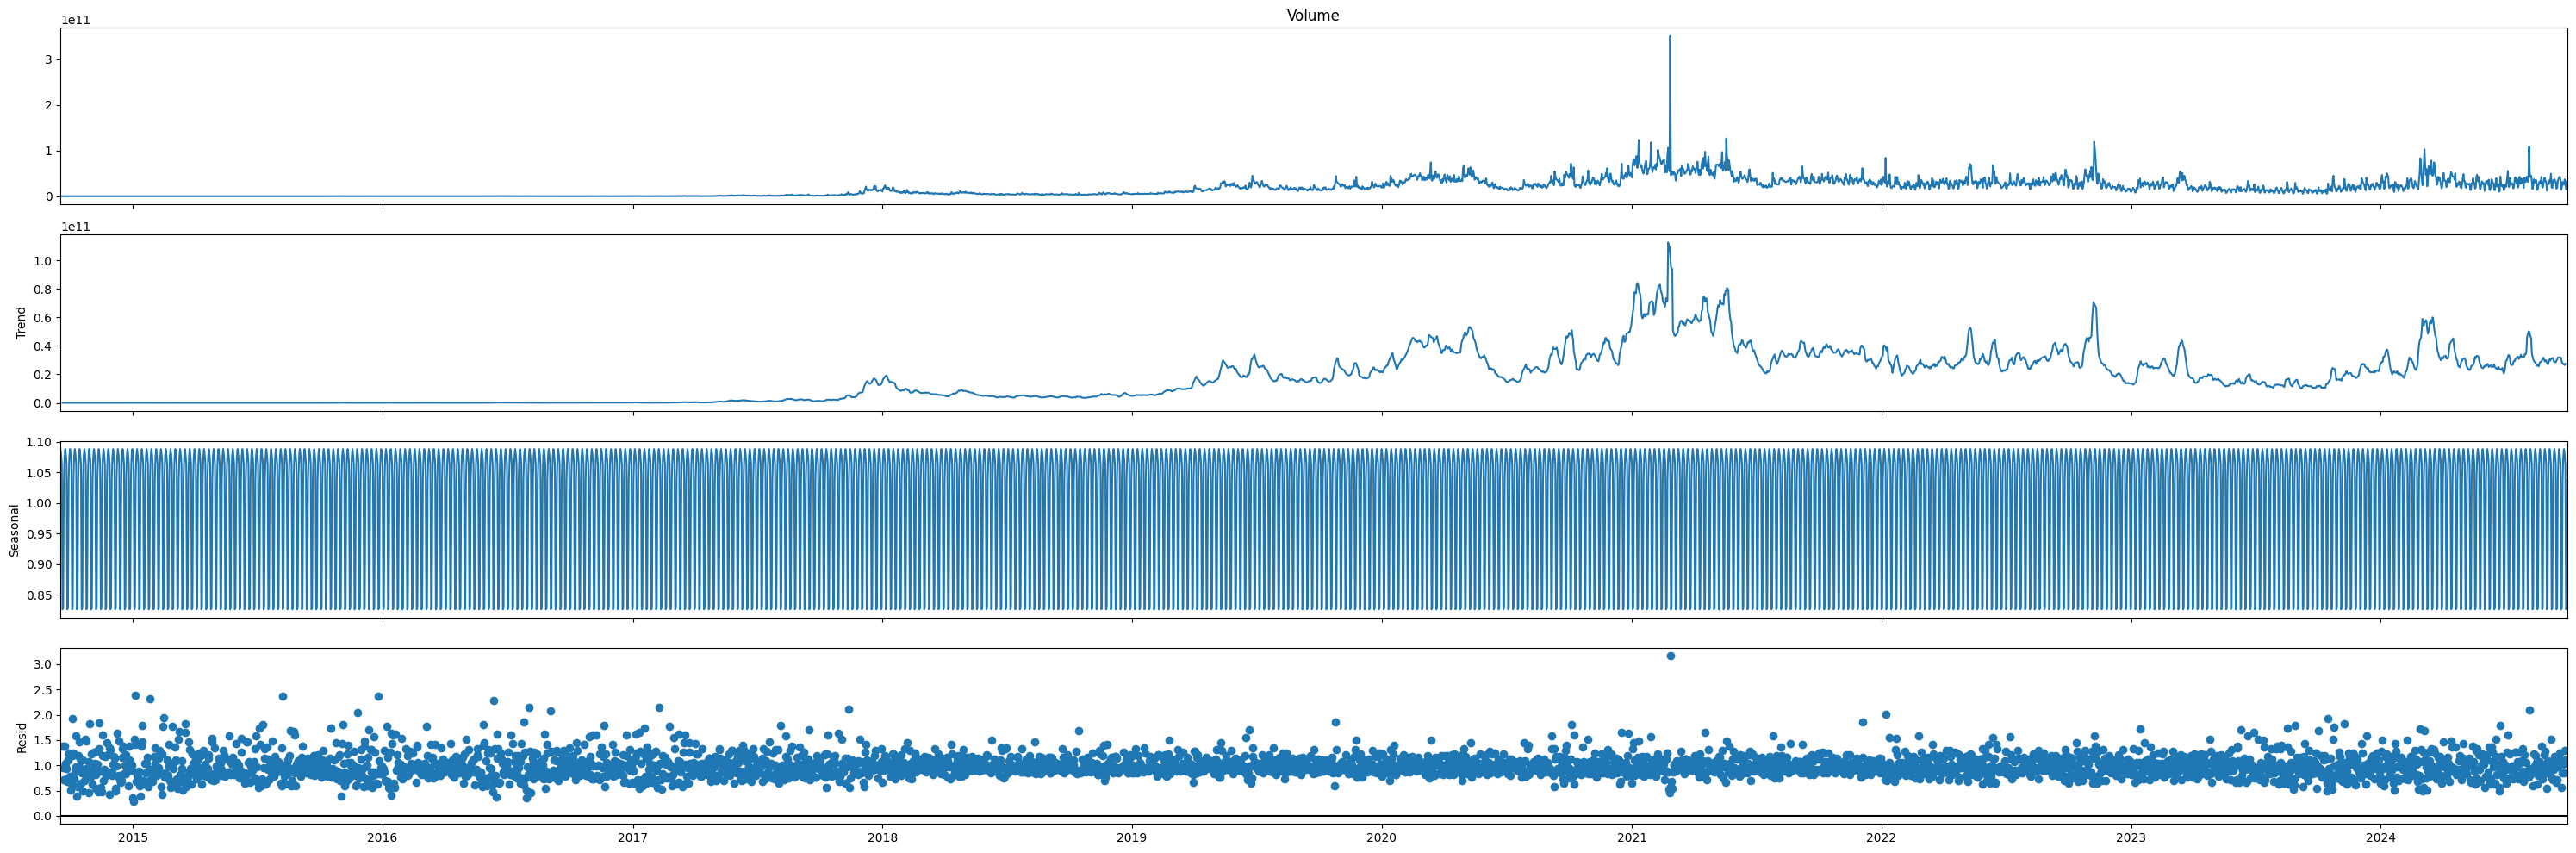

In [16]:
descomposicion=sm_api.tsa.seasonal_decompose(serie, model='multiplicative')

plt.rcParams['figure.figsize'] = [30, 10]
fig=descomposicion.plot()
plt.show()

# Arima

In [17]:
# pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

serie=serie.asfreq('D')    # cambiamos a frecuencia diaria
serie

,Volume
Date,
2014-09-17,21056800
2014-09-18,34483200
2014-09-19,37919700
2014-09-20,36863600
2014-09-21,26580100
...,...
2024-09-26,36873129847
2024-09-27,32058813449
2024-09-28,15243637984


In [18]:
serie.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               ...
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30'],
              dtype='datetime64[ns]', name='Date', length=3667, freq='D')

In [19]:
# separo hasta el 31-12-2022 y el mes de enero de 2023
serie1=serie[:'2022']
serie2=serie['2023':]
serie2

,Volume
Date,
2023-01-01,9244361700
2023-01-02,12097775227
2023-01-03,13903079207
2023-01-04,18421743322
2023-01-05,13692758566
...,...
2024-09-26,36873129847
2024-09-27,32058813449
2024-09-28,15243637984


In [20]:
# invocar modelo ARIMA, entrenar y mostrar resultados para 'serie1'
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA

modelo=sm.tsa.arima.model.ARIMA(serie1.iloc[1:], order=(1,0,0))
resultados=modelo.fit()
print(resultados.summary())


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 3027
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -73906.733
Date:                Fri, 04 Oct 2024   AIC                         147819.466
Time:                        00:48:15   BIC                         147837.512
Sample:                    09-18-2014   HQIC                        147825.954
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.635e+10   5.01e-16   3.26e+25      0.000    1.63e+10    1.63e+10
ar.L1          0.8736      0.001    831.413      0.000       0.872       0.876
sigma2      9.434e+19   3.44e-24   2.74e+43      0.0

In [39]:
pronostico=resultados.fittedvalues
pronostico.name='pronostico'
serief=serie1.iloc[1:]
df=pd.concat([serief,pronostico], axis=1)
df

,Volume,pronostico
Date,,
2014-09-18,34483200,1.634923e+10
2014-09-19,37919700,2.096171e+09
2014-09-20,36863600,2.099173e+09
2014-09-21,26580100,2.098251e+09
2014-09-22,24127600,2.089267e+09
...,...,...
2022-12-27,15748580239,1.245085e+10
2022-12-28,17005713920,1.582448e+10
2022-12-29,14472237479,1.692275e+10


In [28]:
serie1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=3028, freq='D')

In [27]:
pronostico.index

DatetimeIndex(['2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22', '2014-09-23',
               '2014-09-24', '2014-09-25', '2014-09-26', '2014-09-27',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=3027, freq='D')

In [46]:
pronostico

,pronostico
Date,
2014-09-18,1.634923e+10
2014-09-19,2.096171e+09
2014-09-20,2.099173e+09
2014-09-21,2.098251e+09
2014-09-22,2.089267e+09
...,...
2022-12-27,1.245085e+10
2022-12-28,1.582448e+10
2022-12-29,1.692275e+10


In [40]:
type(resultados)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

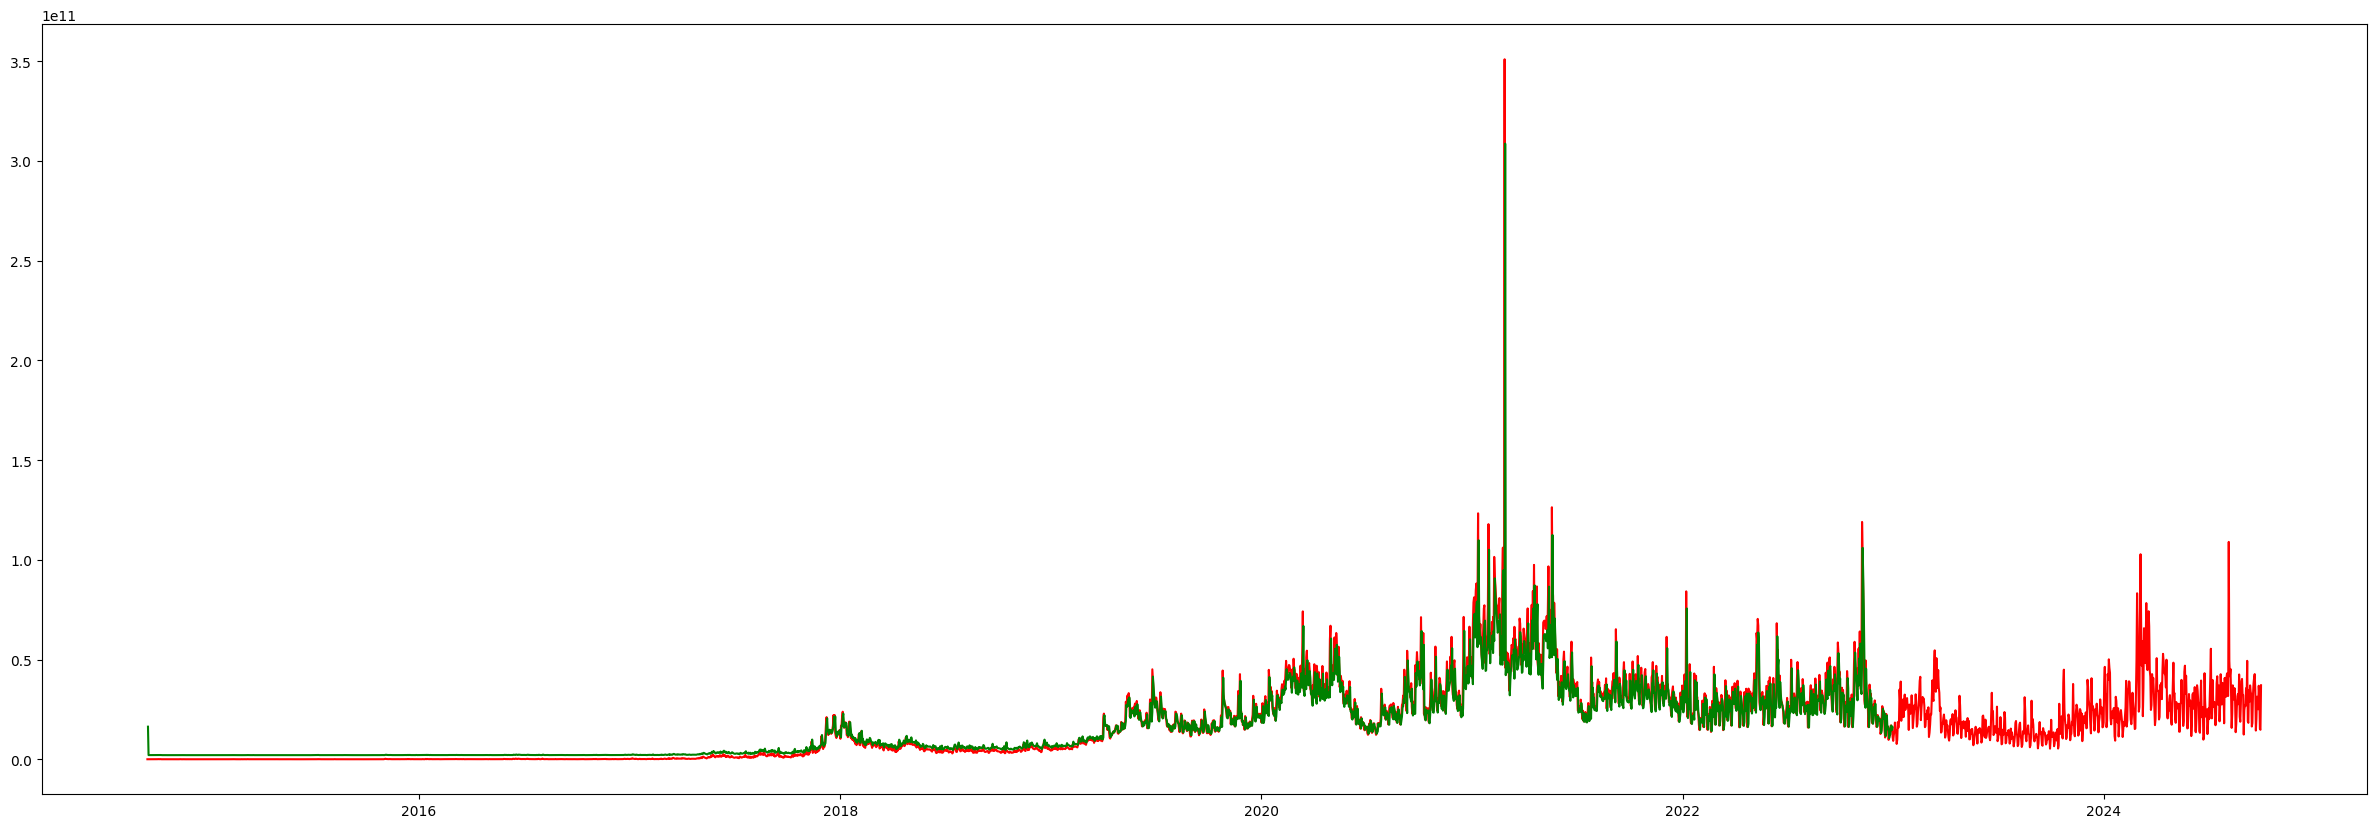

In [41]:
df=bit['Volume'].squeeze()
df['pronostico']=pronostico

plt.plot(bit['Volume'], c='r')
plt.plot(resultados.fittedvalues, c='g')
plt.show()

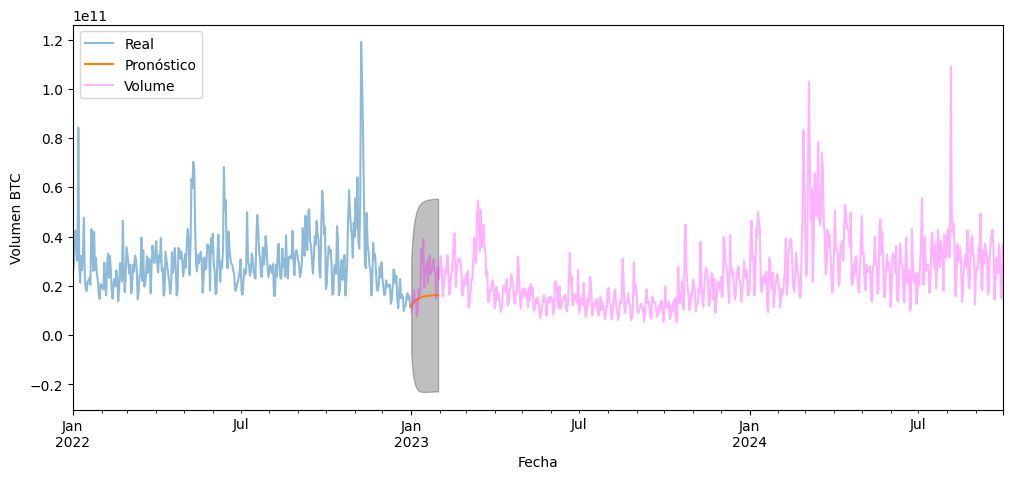

In [42]:
# ahora hagamos un pronóstico (forecast)
pred_f = resultados.get_forecast(steps=30)
pred_ci = pred_f.conf_int()
ax = serie1['2022'].plot(label='Real', figsize=(12, 5), alpha=0.5)
pred_f.predicted_mean.plot(ax=ax, label='Pronóstico')
serie2.plot(color='magenta', alpha=0.3)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen BTC')
plt.legend()
plt.show()

In [44]:
# guardar datos de bitcoin en archivo csv para persistencia,
# después hay que descargarlos a la PC

symbols = ['BTC-USD']
for i in symbols:
    data=yf.download(i,'2017-01-01','2023-01-31')
    data.to_csv(i+'.csv')


[*********************100%***********************]  1 of 1 completed


In [45]:
!ls


BTC-USD.csv  sample_data
